In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics

%matplotlib inline
plt.style.use('seaborn')

In [4]:
df = pd.read_csv('data/diabetes_cleaned.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


Text(0.5, 1.0, 'Scatterplot for Glucose and BMI')

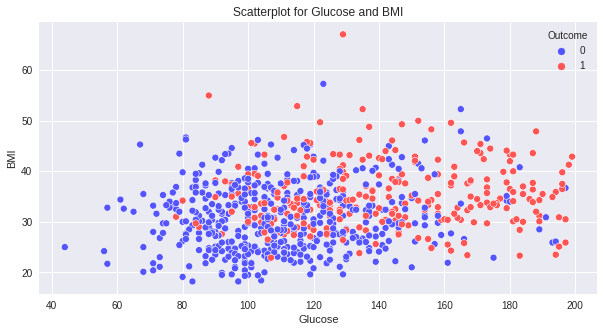

In [5]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=df, x='Glucose', y='BMI', hue='Outcome', palette='seismic', ax=ax)

ax.set_title('Scatterplot for Glucose and BMI')

In [6]:
X = df[['Glucose', 'BMI']]
y = df['Outcome']

In [7]:
dt_cl_2d = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)
dt_cl_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

[Text(418.5, 475.65000000000003, 'Glucose <= 127.5\nentropy = 0.933\nsamples = 757\nvalue = [493, 264]\nclass = 0-Non diabetic'),
 Text(209.25, 339.75, 'BMI <= 26.45\nentropy = 0.712\nsamples = 477\nvalue = [384, 93]\nclass = 0-Non diabetic'),
 Text(104.625, 203.85000000000002, 'BMI <= 22.95\nentropy = 0.069\nsamples = 122\nvalue = [121, 1]\nclass = 0-Non diabetic'),
 Text(52.3125, 67.94999999999999, 'entropy = 0.162\nsamples = 42\nvalue = [41, 1]\nclass = 0-Non diabetic'),
 Text(156.9375, 67.94999999999999, 'entropy = 0.0\nsamples = 80\nvalue = [80, 0]\nclass = 0-Non diabetic'),
 Text(313.875, 203.85000000000002, 'Glucose <= 99.5\nentropy = 0.825\nsamples = 355\nvalue = [263, 92]\nclass = 0-Non diabetic'),
 Text(261.5625, 67.94999999999999, 'entropy = 0.493\nsamples = 130\nvalue = [116, 14]\nclass = 0-Non diabetic'),
 Text(366.1875, 67.94999999999999, 'entropy = 0.931\nsamples = 225\nvalue = [147, 78]\nclass = 0-Non diabetic'),
 Text(627.75, 339.75, 'BMI <= 29.95\nentropy = 0.964\nsam

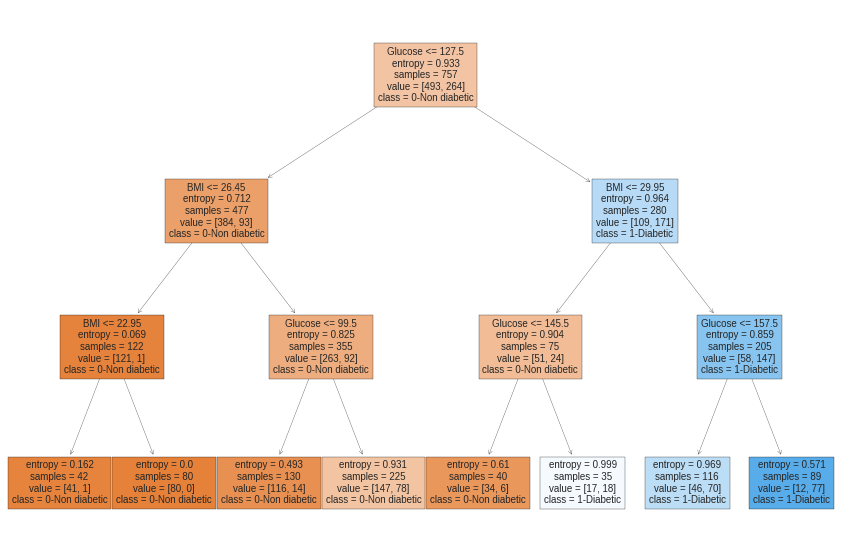

In [8]:
fig = plt.figure(figsize=(15,10))

tree.plot_tree(
    dt_cl_2d,
    feature_names=X.columns,
    class_names=['0-Non diabetic', '1-Diabetic'],
    filled=True
)

In [9]:
x_new = [[180, 51]]
y_new_predict = dt_cl_2d.predict(x_new)
print(f'predicted class: {y_new_predict}')

predicted class: [1]


In [10]:
y_new_predict_proba = dt_cl_2d.predict_proba(x_new)
print(f'predicted proba: {np.round(y_new_predict_proba, 3)}')

predicted proba: [[0.135 0.865]]


In [11]:
def plot_probability_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от 40 до 200, BMI — от 10 до 80
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(np.arange(40, 200, 0.1), np.arange(10, 80, 0.1))
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1,1), xx2.reshape(-1,1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:,1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize=(10, 5))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black')
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(data=X, x='Glucose', y='BMI', hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatterplot with dessigion boundary')
    ax.legend(bbox_to_anchor=(-0.05, 1))
    
    
    

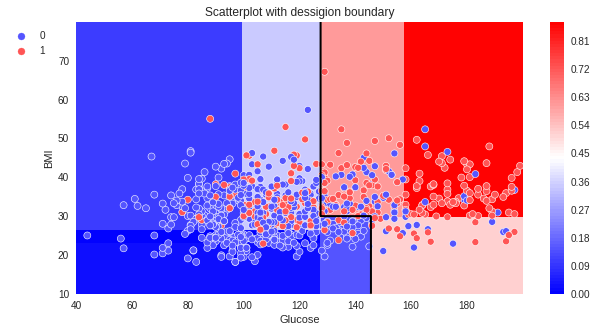

In [12]:
plot_probability_2d(X, y, dt_cl_2d)

In [13]:
y_pred = dt_cl_2d.predict(X)
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



In [14]:
dt_cl_bad = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_cl_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [15]:
y_pred = dt_cl_bad.predict(X)

print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



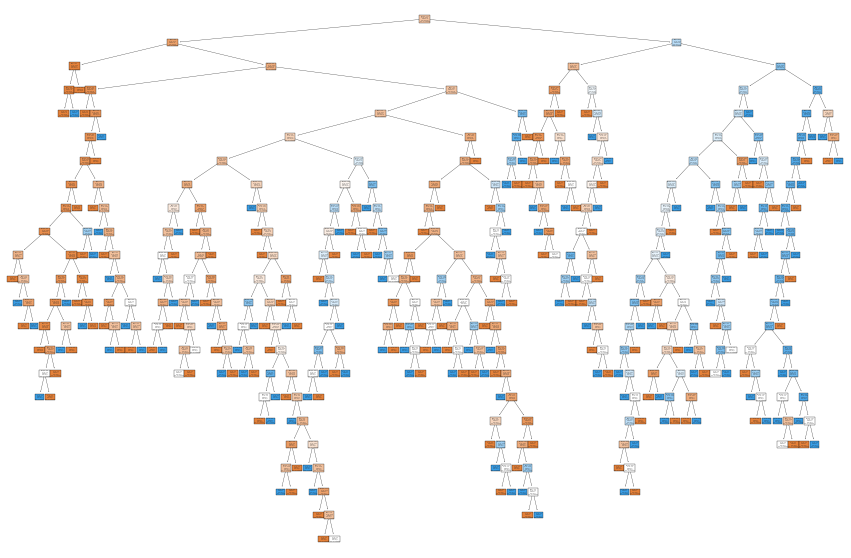

In [16]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
tree_graf = tree.plot_tree(
    dt_cl_bad,
    feature_names=X.columns,
    class_names=["0 - Not diabetic", "1 - Diabetic"],
    filled=True
)

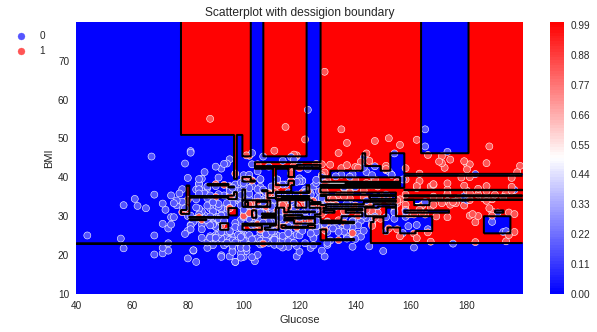

In [17]:
plot_probability_2d(X, y, dt_cl_bad)

In [18]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [19]:
dt_cl_full = tree.DecisionTreeClassifier(
    max_depth=6,
    random_state=42,
    criterion='entropy'
)
dt_cl_full.fit(X, y)
y_pred = dt_cl_full.predict(X)

print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



In [20]:
print(dt_cl_full.feature_importances_)

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


Text(0, 0.5, 'feature importance')

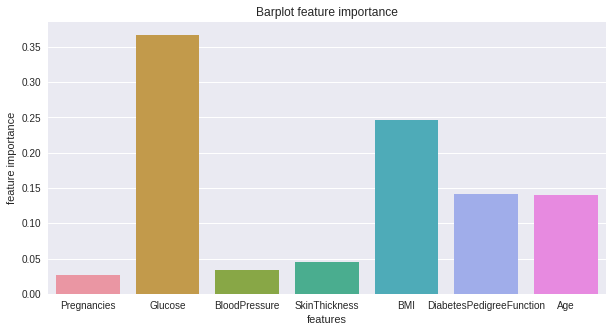

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))
features = X.columns
feature_importance = dt_cl_full.feature_importances_

sns.barplot(x=features, y=feature_importance, ax=ax)
ax.set_title('Barplot feature importance')
ax.set_xlabel('features')
ax.set_ylabel('feature importance')

In [23]:
dt_cl_gini = tree.DecisionTreeClassifier(
    criterion='gini',
    random_state=42,
    max_depth=6
)
dt_cl_gini.fit(X, y)
y_pred = dt_cl_gini.predict(X)

print(round(metrics.f1_score(y, y_pred), 2))

0.78
